# Introduction

Mental health has always been the central topic around workplace culture and wellness conversations. In a study of "mental well-being at the workplace" in 2010, it is increasingly recognized that employees' mental health is a crucial determinant in their overall health. Poor mental health and stressors at the workplace can contribute to a range of physical illnesses. Mental health can also affect their personal and professional lives (Rajgopal). Furthermore, mental issues such as depression and anxiety have a significant economic impact; the estimated cost to the global economy is US$1 trillion per year in lost productivity (who.int).

Technology is a fast-moving industry with high stakes. Tech workers are often under intense pressure to stay on top of a fast-paced, competitive industry. They have to contribute their skills and knowledge to build the companies' values and meet the digital age demand.

Some factors such as long working days, late nights, tight deadlines, gender gaps, and lack of inclusion and diversity contribute to poor mental health in tech. In 2019, BIMA published one of the statistics results in their Tech Inclusivity and Diversity Report. It stated that the mental health in the tech industry is currently in a poor state, not to mention some would even go as far as saying it is reaching a crisis point. The statistic report found that more than 50% of tech employees suffered from anxiety or depression at some point, more than 60% of the respondents were stressed by their work.

Organizations or employers need to recognize how mental wellness can impact their employees' productivity and performance (diversityintech.co.uk). The WHO has found that by investing in mental health wellness every $1 into scaled-up treatment for common mental illness, there is an ROI of $4 in improved health and productivity (who.int).

Though mental health issues in the workplace are important and need to be discussed, mental health is still heavily stigmatized. Mental illness is viewed as a shameful personal deficiency, a failure of weakness. Many people don't feel comfortable discussing their mental health problems or admit that they are dealing with them for fear of being judged by others. People who can't share their experiences or seek treatment are locked up in their bubbles with the intense pressure to balance their personal and professional lives.

The CDC and WHO encourage organizations or employers to promote health awareness and provide employees with support and resources, such as low-cost medical benefits for mental health counseling or mental health programs for preventions and treatments, to improve mental health in the workplace.

Our objective in this report is to analyze the attitude of tech workers towards mental health and the main predictors of mental health illness in the U.S. tech workplace. We explore and analyze the dataset "Mental Health in Tech workplace survey 2014", with questions had questions pertaining to how mental health is perceived at tech workplaces by employees and their employers.



# Dataset Information

The dataset name is `Mental Health in tech survey 2014`.

This dataset contains the following data (column names):

- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

# Data Importing and Cleaning Process

In [1]:
# Import neccesary packages
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
data = pd.read_csv("../input/mental-health-in-tech-survey/survey.csv")
data.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Geographic proportion

In [3]:
# First tranforms "United States" and "United Kingdom" to their initial US and UK respectively.
data['Country'].replace(to_replace = ['United States'],value = 'US', inplace = True)
data['Country'].replace(to_replace = ['United Kingdom'],value = 'UK', inplace = True)

In [4]:
# Check to see how many respondents come from for each countries 
data['Country'].value_counts()

US                        751
UK                        185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Italy                       7
Poland                      7
Switzerland                 7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Austria                     3
Finland                     3
Russia                      3
Colombia                    2
Croatia                     2
Portugal                    2
Denmark                     2
Greece                      2
Thailand                    1
Latvia                      1
Nigeria                     1
Bahamas, The                1
China     

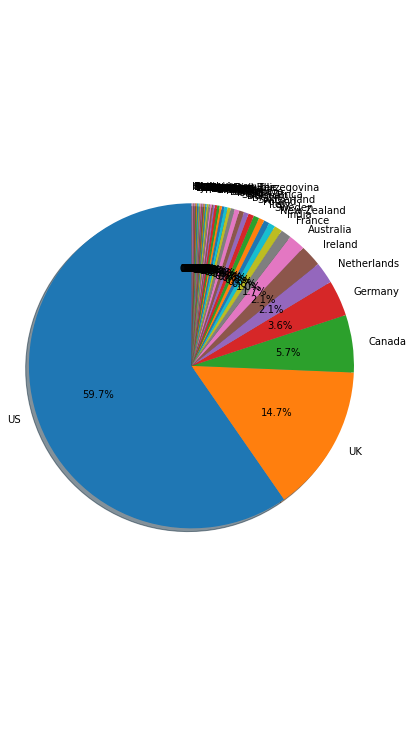

In [5]:
# Countries proportion 
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_axes((0,0,.5,1))
labels =  data['Country'].value_counts().index
sizes = data['Country'].value_counts()
percentages = sizes / 1259 * 100

ax1.pie(percentages, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.savefig('distributionofsurvey.png')

plt.show()

plt.close()

Based on the result, majority of the respondents came from the U.S with nearly 60% of the data. Second highest number of respondents came from the UK. The other countries have very little amount of data be worth for the analysis. Hence, we will use only data that came from the US and UK for this analysis. 

In [6]:
# Filtering countries
countries = ['US','UK']
data = data[data['Country'].isin(countries)]
data['Country'].value_counts()

US    751
UK    185
Name: Country, dtype: int64

Furthermore, when we take a look at the "State" column, we notice that this column can only be applicable to U.S. We will drop this column as well

In [7]:
data['state'].value_counts()

CA    138
WA     70
NY     56
TN     45
TX     44
OH     30
OR     29
PA     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
GA     12
WI     12
MO     12
UT     10
CO      9
AL      8
MD      7
AZ      7
NJ      6
OK      6
KY      5
SC      5
DC      4
IA      4
CT      4
NV      3
VT      3
NH      3
SD      3
KS      3
NM      2
WY      2
NE      2
ME      1
LA      1
ID      1
MS      1
RI      1
WV      1
Name: state, dtype: int64

In [8]:
data.drop(columns=['state'],inplace = True)

### Check for nulls

In [9]:
total_nulls = data.isnull().sum().sort_values(ascending=False)
percent_nulls = (total_nulls/data.isnull().count()).sort_values(ascending=False)
nulls = pd.concat([total_nulls, percent_nulls], axis=1, keys=['Total','Percentages'])
nulls.head()
print(nulls)

                           Total  Percentages
comments                     810     0.865385
work_interfere               188     0.200855
self_employed                 13     0.013889
seek_help                      0     0.000000
obs_consequence                0     0.000000
mental_vs_physical             0     0.000000
phys_health_interview          0     0.000000
mental_health_interview        0     0.000000
supervisor                     0     0.000000
coworkers                      0     0.000000
phys_health_consequence        0     0.000000
mental_health_consequence      0     0.000000
leave                          0     0.000000
anonymity                      0     0.000000
Timestamp                      0     0.000000
Age                            0     0.000000
care_options                   0     0.000000
benefits                       0     0.000000
tech_company                   0     0.000000
remote_work                    0     0.000000
no_employees                   0  

The "comments" column contains too many missing values due to the fact that it is usually an optional text box and people usually choose to skip it. 
We also noticed that TimeStamp columns only contains date and time when respondents submitted their survey. Hence, this data won't contribute much to our analysis.
We will drop these columns because they don't contribute much to this analysis. 

In [10]:
data.drop(columns=['Timestamp','comments'],inplace=True)

The second most missing values are in work_interfere with 20% of missing values in the dataset. We check the data values to see what type of input values this column contains and replacing missing values with "NA". 

In [11]:
data['work_interfere'].value_counts()

Sometimes    360
Never        157
Rarely       132
Often         99
Name: work_interfere, dtype: int64

In [12]:
data['work_interfere'].fillna('NA', inplace = True)
data['work_interfere'].value_counts()

Sometimes    360
NA           188
Never        157
Rarely       132
Often         99
Name: work_interfere, dtype: int64

self_employed contains only 13 missing values. We will convert these missing value to 'No' with the assumption that they aren't self_employed

In [13]:
data['self_employed'].value_counts()

No     839
Yes     84
Name: self_employed, dtype: int64

In [14]:
data['self_employed'].fillna("No", inplace = True)
data['self_employed'].value_counts()

No     852
Yes     84
Name: self_employed, dtype: int64

#### Gender

We noticed there are so many inconsistency in the Gender's input data. We decide to transform anything related to male such as m, mail, M, ect. into lowercase 'male', same to 'female' ,and any other gender identifications are 'other'.

In [15]:
# The result shows 'Gender' contains ununiformed values
data['Gender'].value_counts()

Male                                              462
male                                              114
M                                                 102
Female                                             98
female                                             49
F                                                  35
m                                                  22
f                                                  13
Make                                                4
Woman                                               3
Female                                              2
Cis Male                                            2
Male                                                2
Female (trans)                                      2
p                                                   1
Cis Female                                          1
Trans woman                                         1
Trans-female                                        1
Androgyne                   

In [16]:
# Transform all of the values to lower cases for easy read
data.Gender = data.Gender.str.lower()
data['Gender'].value_counts()

male                                              576
female                                            147
m                                                 124
f                                                  48
make                                                4
woman                                               4
cis male                                            3
male                                                2
female                                              2
female (trans)                                      2
male (cis)                                          1
man                                                 1
trans-female                                        1
agender                                             1
genderqueer                                         1
mail                                                1
femail                                              1
nah                                                 1
p                           

In [17]:
# Recoding male values to male, female values to female, any other gender indentification is other
m = ['male','m','make','male-ish', 'maile', 'cis male','mal','male (cis)','guy (-ish) ^_^','male ','man','msle','mail','malr','cis man']
f = ['female','f','woman','cis female','femake','female ', 'cis-female/femme','female (cis)','femail']
o = ['trans-female','queer/she/they','non-binary','nah', 'all', 'enby', 'fluid', 'genderqueer','androgyne','agender', 'male leaning androgynous','trans woman','neuter','something kinda male?', 'female (trans)', 'queer', 'a little about you','p','ostensibly male, unsure what that really means']

data.Gender.loc[data.Gender.isin(m)]= 'male'
data.Gender.loc[data.Gender.isin(f)]= 'female'
data.Gender.loc[data.Gender.isin(o)]= 'other'

data['Gender'].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


male      716
female    206
other      14
Name: Gender, dtype: int64

### no_employees

In [18]:
data['no_employees'].value_counts()

More than 1000    245
26-100            210
6-25              192
100-500           133
1-5               107
500-1000           49
Name: no_employees, dtype: int64

In [19]:
# Transform 'More than 1000' to >1000
data['no_employees'].replace(to_replace =['More than 1000'], value =['>1000'] , inplace = True)
data['no_employees'].value_counts()

>1000       245
26-100      210
6-25        192
100-500     133
1-5         107
500-1000     49
Name: no_employees, dtype: int64

#### Age

We saw that there are couple of illogical in Age values such as Age in negative values or lower than 16 ( are they legally working ?) or higher than 100. We will drop the age that are illogical first ranges from 16-65 (assump that you can start working at the age of 16 and retired at age of 65).

In [20]:
data['Age'].unique()

array([   37,    44,    31,    33,    35,    42,    36,    29,    23,
          32,    46,    41,    34,    30,    40,    27,    50,    24,
          38,    28,    22,    26,    19,    25,    39,    45,    21,
          18,   -29,    43,    56,    60,    54,   329,    55,    48,
          57,    58,    47,    62,    65,    49, -1726,     5,    20,
          51,    53,    11,    -1,    72])

In [21]:
data.drop(data[data['Age'] < 16].index, inplace=True)
data.drop(data[data['Age'] > 65].index, inplace=True)

data['Age'].unique()

array([37, 44, 31, 33, 35, 42, 36, 29, 23, 32, 46, 41, 34, 30, 40, 27, 50,
       24, 38, 28, 22, 26, 19, 25, 39, 45, 21, 18, 43, 56, 60, 54, 55, 48,
       57, 58, 47, 62, 65, 49, 20, 51, 53])

In [22]:
print(np.sort(data['Age'].unique()))

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 62 65]


# Data Exploration

## Target Variable

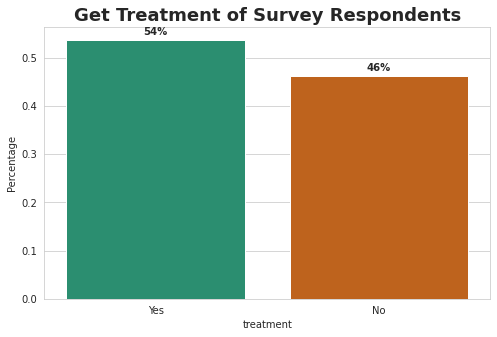

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = data['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

#### Result Interpretation

We evaluate the results of the question "Have you get treatment for a mental health condition?", which is our target variable "treatment". As shown in the diagram above, the percentage of respondents who want to get treatment is 54%, and not getting treatment is around 46%. These results indicate that tech workplaces should promote mental health and support employees with mental health issues. According to the CDC website, workplaces promote mental health programs that have proven successful, especially when combining psychological and physical health interventions. Poor mental health and stress can negatively affect employees, such as job performance and productivity, engagement with one's work, communication between coworkers, and physical capability and daily functioning.
We decide to investigate different aspects to see what factors leading to employees want to get treatment, especially from companies' support programs and systems.

## Respondents' Demograhics and Geographics

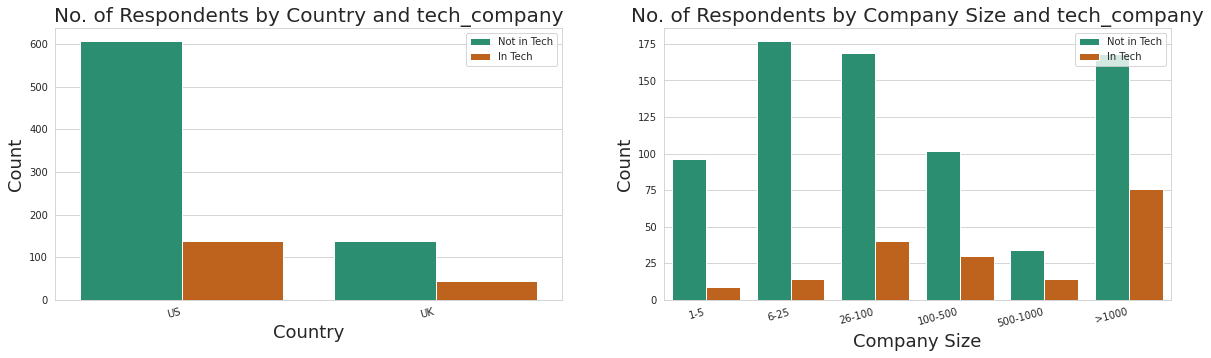

<Figure size 1152x288 with 0 Axes>

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# plt.suptitle('Main Title')

# No of respondents by Country
sns.countplot(x = data['Country'], hue = data['tech_company'], ax=ax1, palette="Dark2")
ax1.set_title('No. of Respondents by Country and tech_company', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = data['no_employees'], hue = data['tech_company'], ax=ax2, 
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'], palette="Dark2")
ax2.set_title('No. of Respondents by Company Size and tech_company', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);

#### Result interpretation 

Majority of the respondents from the U.S and U.K are not in technology-based companies even they are working in tech positions. Most of these tech-based employees are from mid-size to large-size company.

### Age

In [25]:
np.sort(data.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 54, 55, 56, 57, 58, 60, 62, 65])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


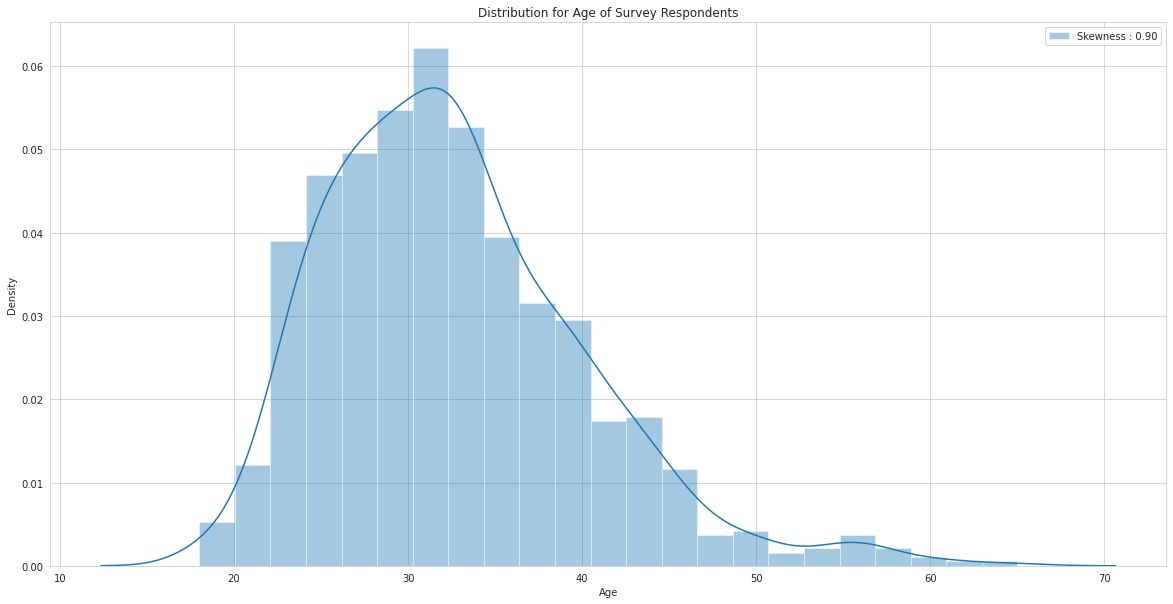

In [26]:
plt.figure(figsize = (20,10))
sns.distplot(data['Age'],label = 'Skewness : %.2f'%(data['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')

plt.show()

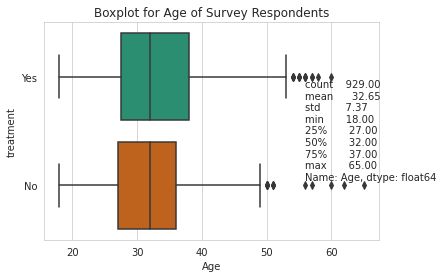

In [27]:
sns.boxplot(x = "Age", y = "treatment", data = data, palette="Dark2")
plt.title('Boxplot for Age of Survey Respondents')
age = str(data['Age'].describe().round(2))
plt.text(56, 0.95, age)
plt.show()

We plot the Distribution for Age of the Survey Respondents by histogram and boxplot (figure 5 and 6). The minimum age is 18 years old, and the oldest respondents' age is 65. The boxplot result indicates most of the survey respondents around their mid 20s to early 40s. The distribution score of 0.90 means the data are highly positive right-skewed. The distribution of ages is right-skewed, which is expected as the tech industry tends to have younger employees. Boxplot result also shows no statistically significant difference of ages between respondents who say yes and no to seek treatments.

#### Gender 

In [28]:
pal = sns.color_palette("Dark2")
print(pal.as_hex())

['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


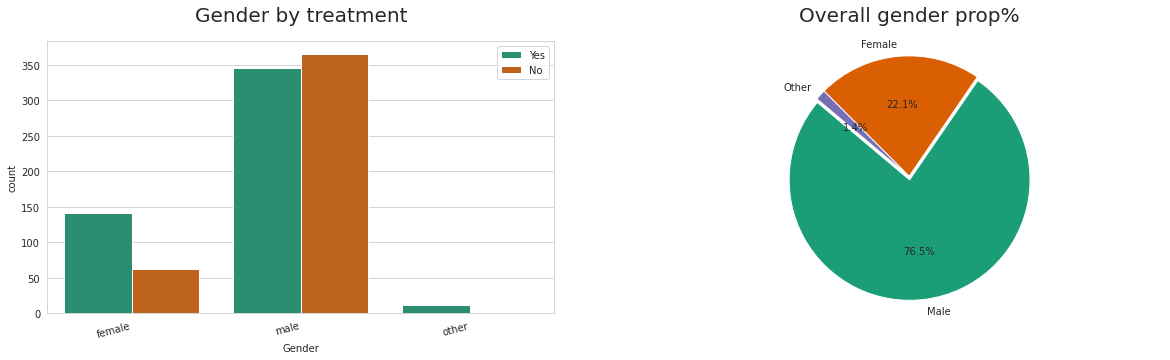

<Figure size 1152x288 with 0 Axes>

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

total = data['Gender'].count()
males = data[data['Gender'] == 'male']['Gender'].count()
females = data[data['Gender'] == 'female']['Gender'].count()
other = data[data['Gender'] == 'other']['Gender'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/total, females/total, other/total]
colors = ['#1b9e77', '#d95f02', '#7570b3']
explode = ( 0.03, 0, 0)

ax2.pie(sizes, explode= explode, labels = labels, colors=colors, autopct='%1.1f%%',shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%',pad=20, fontsize=20)

#Barchart for seek for treatment
sns.countplot(data['Gender'], hue = data['treatment'], ax=ax1, palette="Dark2")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha='right')
ax1.set_title('Gender by treatment', pad =20,fontsize = 20)
ax1.set_xlabel('Gender')
ax1.set_ylabel('count')
ax1.legend(['Yes', 'No'])


fig.show()

In [30]:
data.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Encoding categorical variables

In [31]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),data[col].unique()))

AGE :[37 44 31 33 35 42 36 29 23 32 46 41 34 30 40 27 50 24 38 28 22 26 19 25
 39 45 21 18 43 56 60 54 55 48 57 58 47 62 65 49 20 51 53] 
GENDER :['female' 'male' 'other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' 'NA'] 
NO_EMPLOYEES :['6-25' '>1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_INTERVIEW :['Maybe' 'No' 'Yes'] 
MEN

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfencode = data.copy() ## we can seperate orginal format of variables by using copy()

In [33]:
# Label Encoding the categorical variables

object_cols = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
for col in object_cols:
    le.fit(dfencode[col])
    dfencode[col] = le.transform(dfencode[col])

In [34]:
dfencode.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,1,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,1,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
3,31,1,0,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,1,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0
5,33,1,1,0,1,0,4,4,0,1,...,0,0,1,1,2,2,1,0,0,0


### Run correlation heatmap

It is important to see whether the dependent variables have any relationships with target variable.

In [35]:
corr = dfencode.corr(method="spearman")
corr

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.094179,0.111141,0.058350,0.010665,0.043968,0.052142,0.019119,0.166788,-0.054202,...,0.026489,0.010523,0.011405,-0.080145,-0.001480,0.014372,0.064245,0.014842,-0.026266,0.049121
Gender,0.094179,1.000000,-0.103603,0.026240,-0.104271,-0.143924,-0.065238,0.043789,-0.004260,0.028156,...,-0.017205,-0.001978,0.025562,0.033652,0.050729,0.084489,-0.030669,-0.026581,-0.038090,-0.057672
Country,0.111141,-0.103603,1.000000,-0.111956,0.101130,0.037014,0.034268,0.064003,0.078591,0.059452,...,0.016256,-0.111716,-0.001892,0.069942,-0.032539,-0.037537,0.016015,-0.001648,-0.053582,-0.098798
self_employed,0.058350,0.026240,-0.111956,1.000000,0.007153,0.030096,0.053002,-0.334274,0.314654,0.049161,...,0.121116,0.188036,0.005861,0.019534,0.067078,0.026809,0.032439,-0.026242,0.117272,0.067556
family_history,0.010665,-0.104271,0.101130,0.007153,1.000000,0.353365,0.325149,-0.050229,0.029472,-0.038243,...,0.076441,0.058691,0.048217,0.000351,0.005963,0.000391,0.050317,0.049871,0.047312,0.105832
treatment,0.043968,-0.143924,0.037014,0.030096,0.353365,1.000000,0.632143,-0.053901,0.032308,0.007035,...,0.176225,0.096064,0.026251,-0.034992,0.051477,-0.057352,0.108265,0.058592,0.063569,0.148507
work_interfere,0.052142,-0.065238,0.034268,0.053002,0.325149,0.632143,1.000000,-0.073798,0.048891,0.038214,...,0.064531,0.061429,0.027906,-0.061731,0.017103,-0.098400,0.103868,-0.006575,0.043301,0.131831
no_employees,0.019119,0.043789,0.064003,-0.334274,-0.050229,-0.053901,-0.073798,1.000000,-0.227042,-0.107517,...,-0.000074,-0.107323,0.002484,-0.068570,-0.106624,-0.086788,0.047395,0.033766,-0.004918,0.009879
remote_work,0.166788,-0.004260,0.078591,0.314654,0.029472,0.032308,0.048891,-0.227042,1.000000,0.136353,...,-0.020747,0.103596,0.057096,-0.018112,0.071846,0.023791,-0.045736,-0.017347,0.021720,-0.045620
tech_company,-0.054202,0.028156,0.059452,0.049161,-0.038243,0.007035,0.038214,-0.107517,0.136353,1.000000,...,-0.075511,0.029043,0.015297,0.062051,0.076704,0.071336,-0.023692,-0.035817,-0.002297,-0.020482


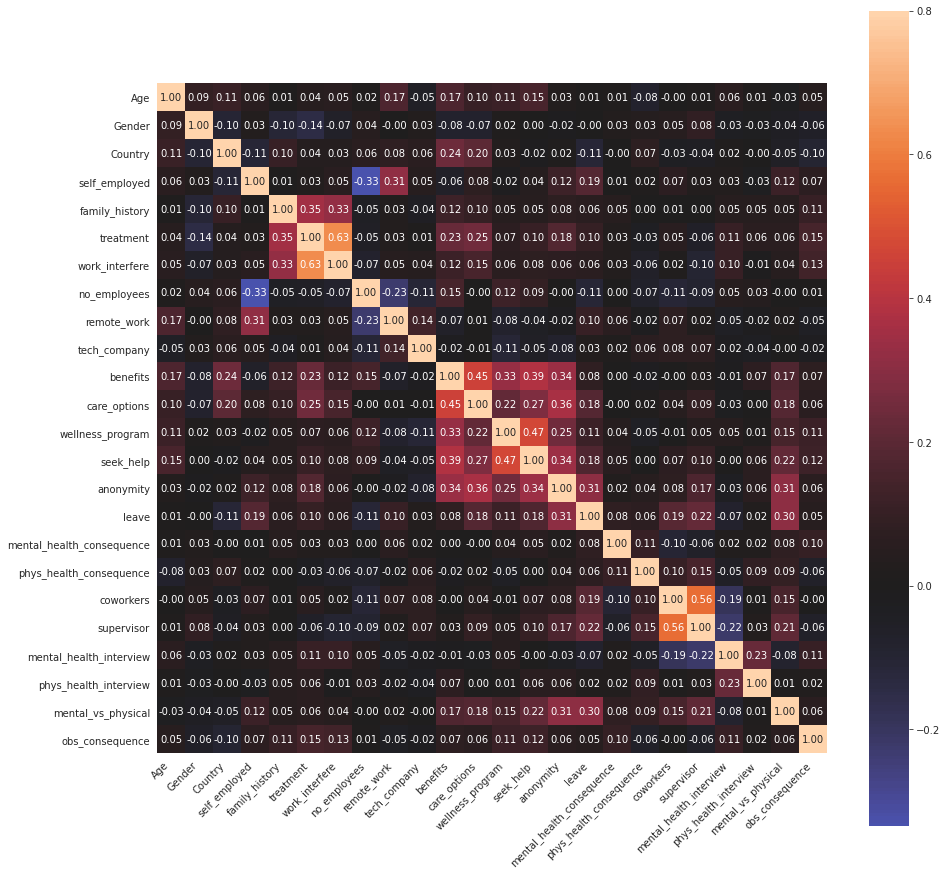

In [36]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10}, 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()


As shown in the map above, we can detect there are no relationships between target variable "treatment" and variables: Age, Country, self_employeed, remote_work, tech_company, mental_health_consequence, no_employees, physical_health_consequence, coworkers, phys_health_interview, mental_vs_physical. 
Besides, there are positively weak relationships between treatment and variables: wellness_program (7% ), seek_help (10%), anonymity (18% ),  leave (10% ), obs_consequence (15%), and mental_health_interview(10%). There are positively moderate relationships between treatment and variables: family_history (35%), benefits (23% ), care_options (25%). There is a negatively weak relationship between treatment and Gender (-14%)
Lastly, there is a strong relationship between treatment and work_interfere (63%).
We need to understand the respondents' reactions and attitudes toward mental health in their workplace. Hence, we statically analyze each of the variables that have relationships with treatment. 

#### family_history

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


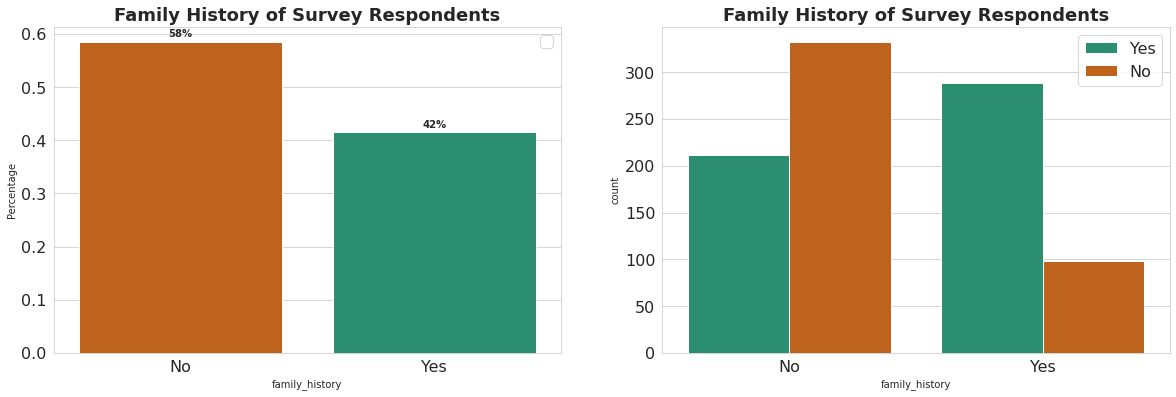

In [37]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette=dict(No = '#d95f02', Yes = '#1b9e77'))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['family_history'], hue = data['treatment'],  palette=dict(No = '#d95f02', Yes = '#1b9e77'))
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Around 42% of the respondents said that they have a family history of mental illness. The plots in fig. 14 show that these respondents also prefer to seek treatment compared to those that don't have any family history of mental illness. This is explainable since the respondents with mental illness have more awareness, experience, and concern about their mental health in their family history. They are more open to seeking treatments when facing mental health issues. Some research suggests that mental illness can run in the family and may be passed on for different reasons, not just genes (rethink.org). Another study, "Inheriting Mental Disorders," stated that the chance of an individual having a specific mental disorder is higher if other family members have that same mental disorder (healthychildern.org). 

### Work_interfere

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


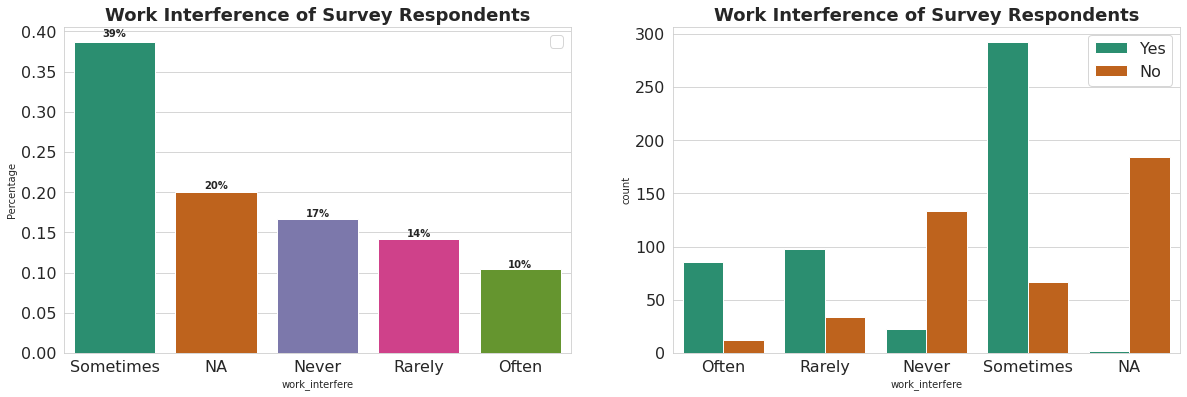

In [38]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['work_interfere'], hue = data['treatment'],  palette=dict(No = '#d95f02', Yes = '#1b9e77'))
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

The respondents were asked to describe the frequency of mental health condition interferes with their work. 
We want to see whether these respondents who admitted mental issues interfered with their work seek treatment (see  Fig. 15). The responses included "Sometimes" with 39%, "Never" with 17%, "Rarely" with 14%, "Often" with 10%, and 20% of NA. Overall, we can see that about 65% of the responses admitted mental health issues interfered with their work sometimes, rarely, and often. 
The result from the second plot also shows people actually admitted and choose to seek treatments for their mental health. This is a good sign of how people consider their mental health treatment to improve their work environment or performance. 
Surprisingly, on the other hand, we can also see some people who answered "Never" to the question but still seek treatment. These may be the early or prevention treatments for mental health issues (due to stress) before work or the project starts.

### Observed consequence

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


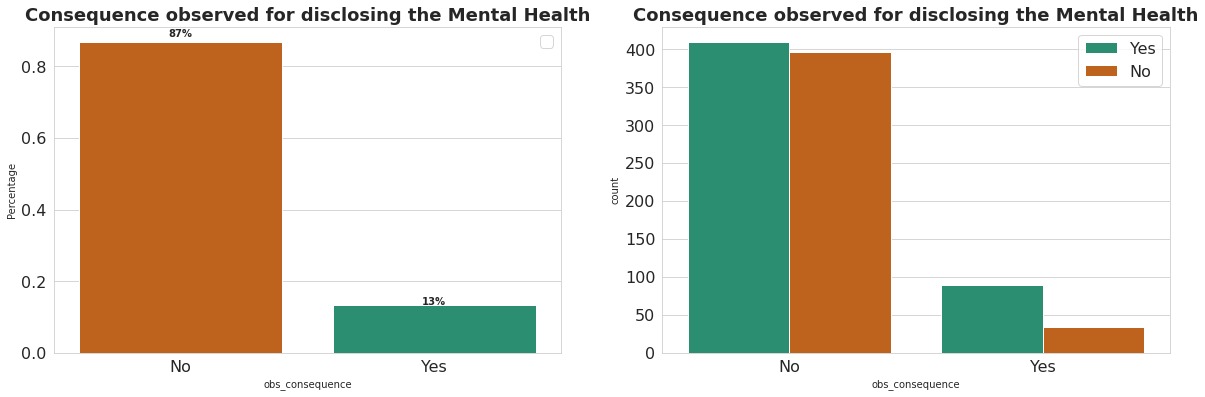

In [39]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette=dict(No = '#d95f02', Yes = '#1b9e77'))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['obs_consequence'], hue = data['treatment'], palette='Dark2')
    
plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

The "obs_consequence" column stores the result to the question "Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?"
There is 13% of respondents agree that they know the negative consequences for coworkers with mental health issues; almost 70% of them want to get treatment (Fig. 16). Observing the coworkers who suffered from mental health issues encourages people to seek treatments for prevention.

### Benefits

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


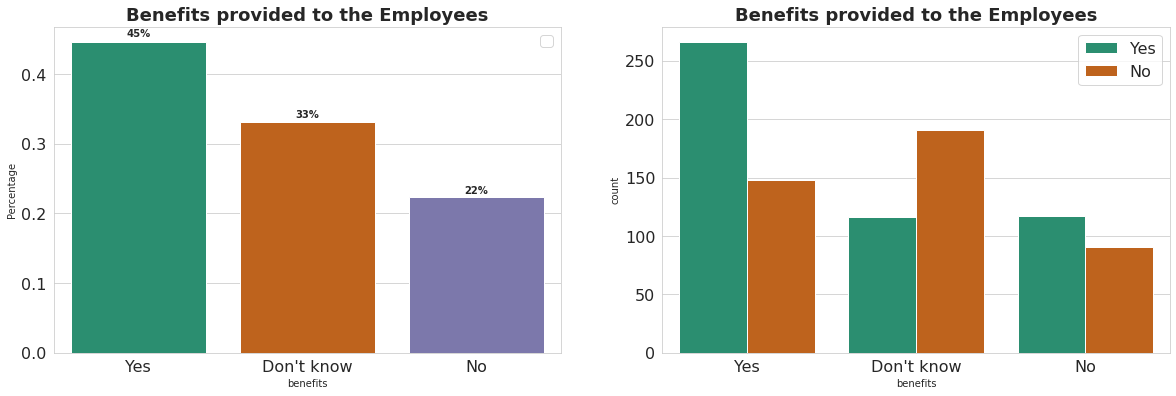

In [40]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = data['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['benefits'], hue = data['treatment'], palette='Dark2')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

More than 45% of the respondents know about the mental health benefits offered by their employers, and 60% of them want to seek treatment. Many people don't know that their employers offer mental health benefits (33%). Surprisingly, among these people who don't know about mental health benefits, nearly  45% of them still want to seek mental health treatment. The goal for the companies is to raise awareness of the benefits so employees can take advantage of them to improve their mental health in the workplace.

### Care_options

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


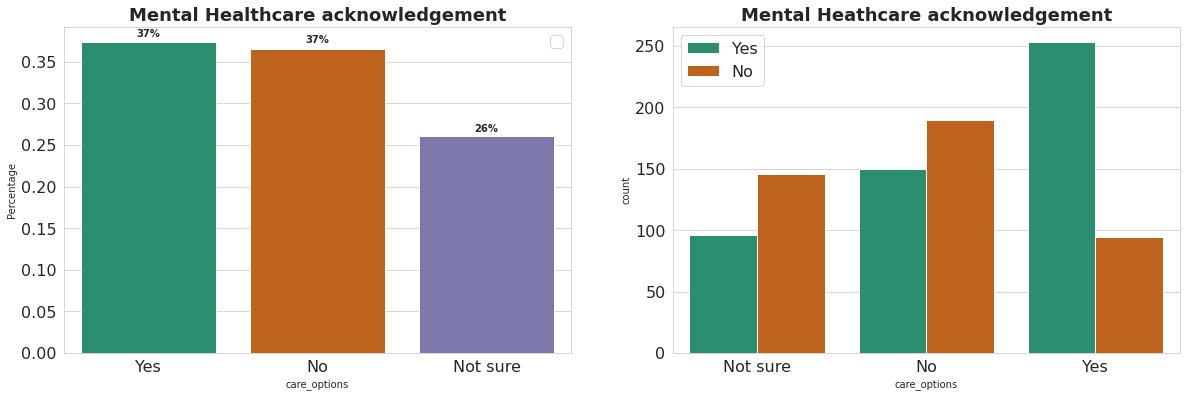

In [41]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare acknowledgement', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['care_options'], hue = data['treatment'], palette='Dark2')
plt.title('Mental Heathcare acknowledgement', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### wellness program

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


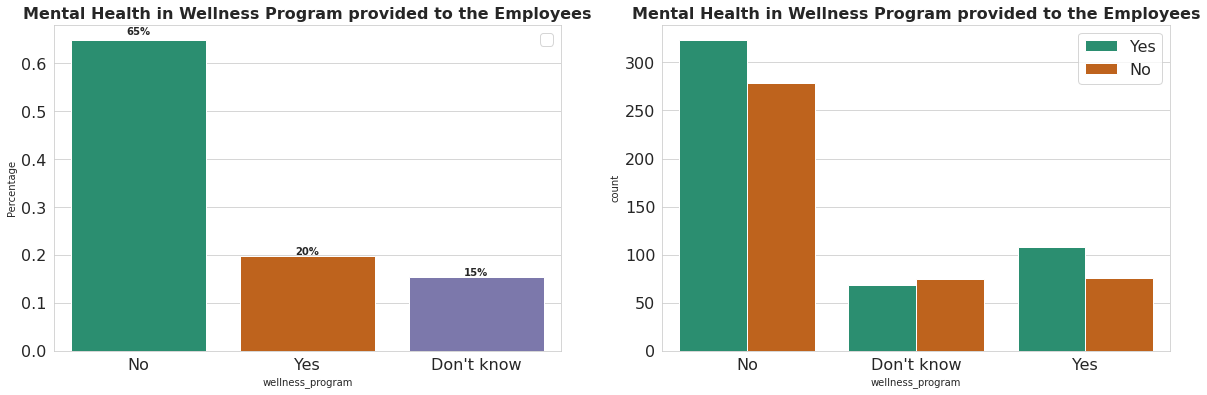

In [42]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['wellness_program'], hue = data['treatment'], palette='Dark2')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

There are 20% of the respondents said Yes to Mental Health is offered in their companies' wellness programs. About 60% of them chose to seek treatment. However, it is concerned to see there are 65% of the respondents said that they aren't offered mental health as a part of their wellness programs provided by the companies. Though more than 60% of them still seek treatments, which means companies need to fulfill their duties and include mental health as a part of their wellness programs. 

### seek_help

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


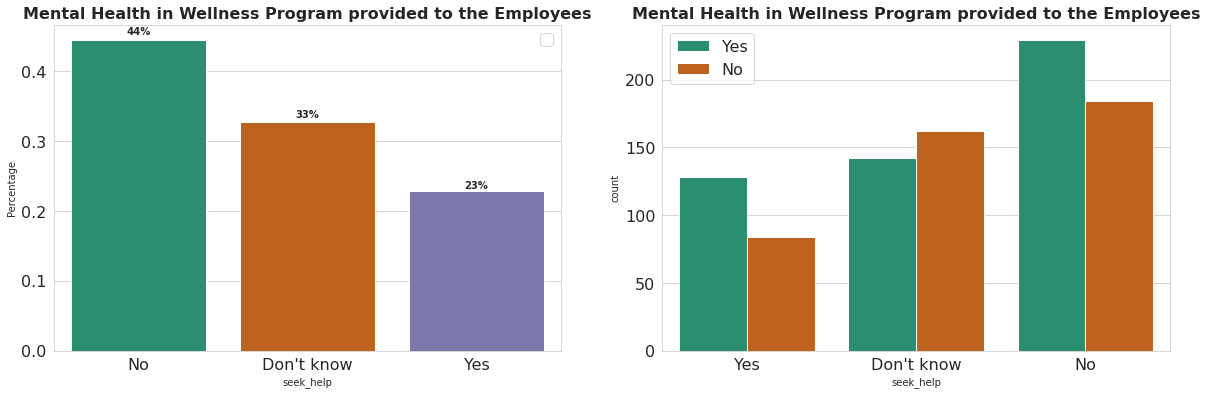

In [43]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['seek_help'].value_counts(normalize = True).rename_axis('seek_help').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'seek_help', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['seek_help'], hue = data['treatment'], palette='Dark2')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

 Similar to care_options, wellness_program, and benefits, this question is also related to companies' mental health support systems. 44% said their companies don't provide mental health in their wellness programs, while only 23% said their companies actually provide support systems for mental health programs. Either companies provide mental health support as a part of a well program, employees still choose to seek treatments. Only those who don't know about mental health issues, choose not to seek treatments. Companies should raise awareness of mental health issues and provide more information about mental health issues and supports to their employees. 

### Anonymity

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


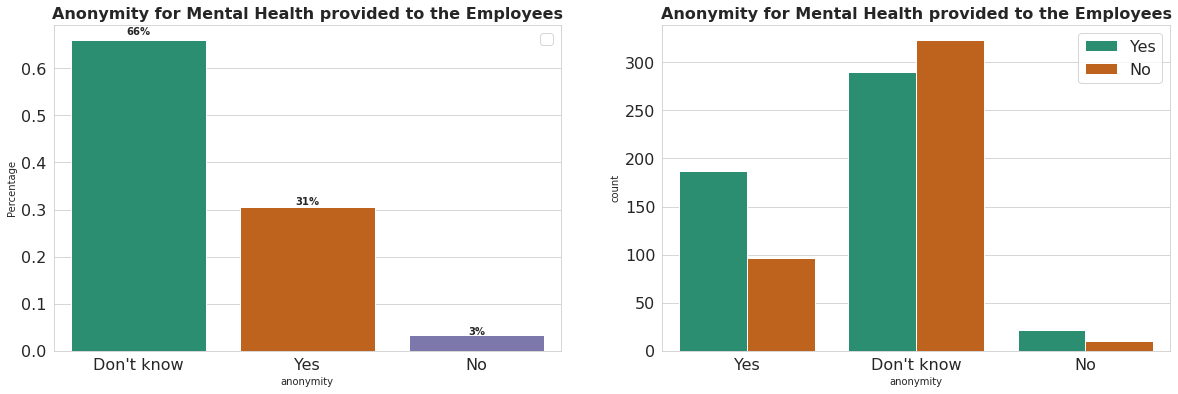

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['anonymity'], hue = data['treatment'], palette='Dark2')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Anonymity is an interesting question about whether the respondents' anonymity protected if they choose to take advantage of mental health or substance abuse treatment resources?
About 31% of their responses are “yes.” They know their anonymity is protected while taking advantage of mental health or substance abuse treatment resources, and more than 65% want to get treatment. However, more than 66% of the respondents don't know if their anonymity is protected and decide not to seek treatments. Like benefits awareness, companies need to promote this information to their employees to build trust and encourage them to seek treatments if issues occur.

### LEAVE

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


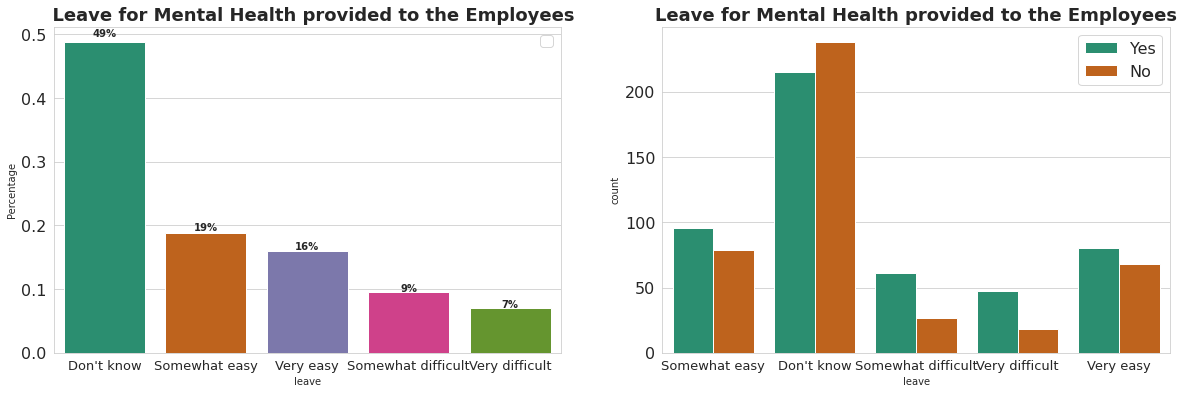

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['leave'], hue = data['treatment'], palette='Dark2')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


### Mental Health in the Interview

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


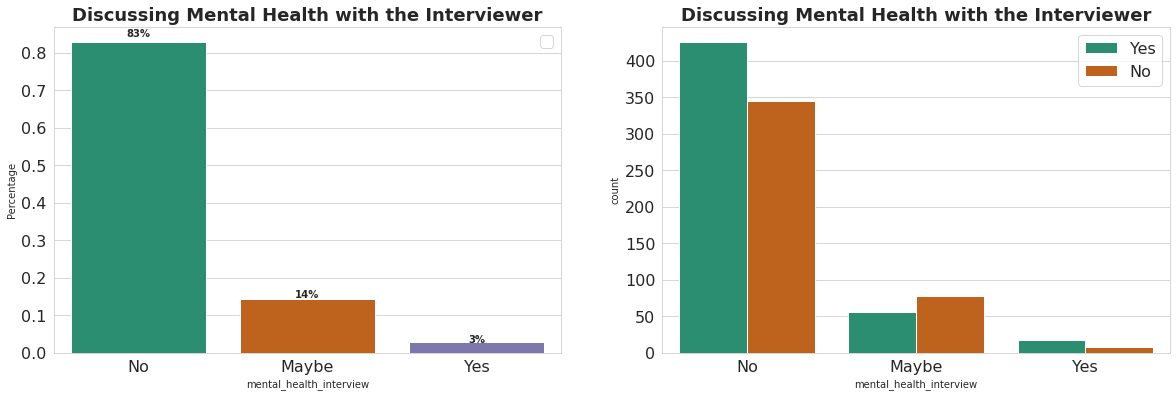

In [46]:
 plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = data['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data['mental_health_interview'], hue = data['treatment'], palette='Dark2')
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Modeling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [48]:
feature_columns = ['Gender','wellness_program','seek_help','anonymity','leave','obs_consequence','mental_health_interview','family_history','benefits','care_options','work_interfere']
X = dfencode[feature_columns]
y = dfencode['treatment']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 99)

Detecting k value using elbow technique 

Text(0.5, 0, 'K Value')

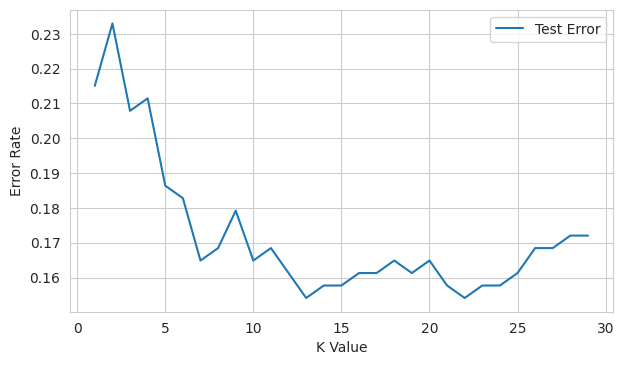

In [50]:
from sklearn.neighbors import KNeighborsClassifier
test_error_rates = []
for k in range (1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_error_rates.append(test_error)
plt.figure(figsize=(7, 4), dpi=100)
plt.plot(range(1, 30), test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

Choose k-value that has the lowest rate which is 14 or 22

In [51]:
def model_pred(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, preds), '\n',
          'Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

In [52]:
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_pred(lg, 'Logistic Regression')

# KNN
knn = KNeighborsClassifier(n_neighbors=14)
model_pred(knn, name='KNN')

# Decission trees
tree = DecisionTreeClassifier()
model_pred(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_pred(rforest, 'Random Forest')

# Gradient Booster
gb = GradientBoostingClassifier(random_state=20)
model_pred(gb, 'Gradient Booster')

# AdaBoost
ab = AdaBoostClassifier()
model_pred(ab,'Ada Boost')


--- Logistic Regression --- 
 [[ 94  35]
 [ 14 136]] 
 Accuracy: 0.82437 

--- KNN --- 
 [[ 95  34]
 [ 10 140]] 
 Accuracy: 0.84229 

--- Decission Trees --- 
 [[100  29]
 [ 33 117]] 
 Accuracy: 0.77778 

--- Random Forest --- 
 [[ 96  33]
 [ 12 138]] 
 Accuracy: 0.83871 

--- Gradient Booster --- 
 [[ 96  33]
 [ 13 137]] 
 Accuracy: 0.83513 

--- Ada Boost --- 
 [[ 94  35]
 [ 10 140]] 
 Accuracy: 0.83871 

